<a href="https://colab.research.google.com/github/jhseo01/github_test/blob/main/AutoEncoder_Anomaly_Detection_0704_image_1%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os
from keras.models import load_model


In [ ]:
image_datas = glob('/content/dataset/cat/*.jpg')
class_name = ["cat"]
dic = {"cat":1}

In [ ]:
X = []
Y = []
for imagename in image_datas:
    image = Image.open(imagename)
    image = image.resize((128, 128))
    image = np.array(image)
    X.append(image)
    label = imagename.split('/')[3]
    label = dic[label]
    Y.append(label)

In [ ]:
X = np.array(X)    
Y = np.array(Y)

In [ ]:
X.shape

(54, 128, 128, 3)

In [ ]:
#train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=44)
train_images = X
train_labels = Y

In [ ]:
#train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

In [ ]:
train_labels = train_labels[..., tf.newaxis]
#test_labels = test_labels[..., tf.newaxis]

In [ ]:
#train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

In [ ]:
x_train = train_images
#x_test = test_images

In [ ]:
x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.

In [ ]:
# Create the Encoder and Decoder
#pass the gray scale input image of size(128,128,3)
inputs = tf.keras.Input(shape=(128, 128, 3), name='input_layer')
# Conv Block 1 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(32, kernel_size=3, strides= 1, padding='same', name='conv_1')(inputs)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_1')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_1')(encoded)
# Conv Block 2 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides= 2, padding='same', name='conv_2')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_2')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_2')(encoded)
# Conv Block 3 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', name='conv_3')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_3')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_3')(encoded)
#Decoder
# DeConv Block 1-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 1, padding='same',name='conv_transpose_1')(encoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_4')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_4')(decoded)
# DeConv Block 2-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 2, padding='same', name='conv_transpose_2')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_5')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_5')(decoded)
# DeConv Block 3-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(32, 3, 2, padding='same', name='conv_transpose_3')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_6')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_6')(decoded)
# output
outputs = tf.keras.layers.Conv2DTranspose(3, 3, 1,padding='same', activation='sigmoid', name='conv_transpose_4')(decoded)

In [ ]:
def SSIMLoss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

In [ ]:
autoencoder = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(lr = 0.0005)
autoencoder.compile(optimizer=optimizer, loss=SSIMLoss)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist=autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test)
                validation_data=(x_train, x_train)
                )

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.9693 - val_loss: 0.7034
Epoch 2/1000
1/1 [==============================] - 0s 194ms/step - loss: 0.9357 - val_loss: 0.7029
Epoch 3/1000
1/1 [==============================] - 0s 197ms/step - loss: 0.9005 - val_loss: 0.7025
Epoch 4/1000
1/1 [==============================] - 0s 183ms/step - loss: 0.8628 - val_loss: 0.7021
Epoch 5/1000
1/1 [==============================] - 0s 182ms/step - loss: 0.8219 - val_loss: 0.7014
Epoch 6/1000
1/1 [==============================] - 0s 193ms/step - loss: 0.7796 - val_loss: 0.7008
Epoch 7/1000
1/1 [==============================] - 0s 196ms/step - loss: 0.7372 - val_loss: 0.7000
Epoch 8/1000
1/1 [==============================] - 0s 179ms/step - loss: 0.6942 - val_loss: 0.6987
Epoch 9/1000
1/1 [==============================] - 0s 184ms/step - loss: 0.6501 - val_loss: 0.6971
Epoch 10/1000
1/1 [==============================] - 0s 195ms/step - loss: 0.6077 - val_loss: 0.6951
Ep

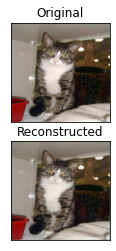

In [ ]:
decoded_imgs = autoencoder.predict(x_train)
n = 2
plt.figure(figsize=(20, 4))
for i in range(2, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
ANom_score = autoencoder.evaluate(x_train, x_train, verbose=0)

In [ ]:
ANom_score

0.02794402837753296

In [ ]:
image1 = Image.open('/content/cat.0.jpg')
image1 = image1.resize((128, 128))
image1 = np.array(image1)

In [ ]:
X2 = []
X2.append(image1)
X2 = np.array(X2)
X2 = X2.astype('float32') / 255.

In [ ]:
ANom_score = autoencoder.evaluate(X2, X2, verbose=0)
ANom_score

0.04288965463638306

In [ ]:
0.032788753509521484
0.03035062551498413
0.031150102615356445

0.16014081239700317
0.03768962621688843
0.03906768560409546